In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# EDDS Exercise 1
## Data Exploration
Setup Data

In [3]:
data = pd.read_table("ml-100k/u.data", names=["user_id", "movie_id", "rating", "timestamp"])
genre = pd.read_table("ml-100k/u.genre", sep="|", names=["genre", "genre_id"])
item = pd.read_table("ml-100k/u.item", sep="|", encoding="ISO-8859-1", names=["movie_id", "movie_title", "release_date", "video_release_date", "imdb_url", "unknown", "action", "adventure", "animation", "children", "comedy", "crime", "documentary", "drama", "fantasy", "film_noir", "horror", "musical", "mystery", "romance", "scifi", "thriller", "war", "western"])
user = pd.read_table("ml-100k/u.user", sep="|", names=["user_id", "age", "gender", "occupation", "zip_code"])

display(item)


,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,scifi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Merge datasets and set datatypes

In [4]:
df = data.merge(user, how="left", on="user_id")
df = df.merge(item, how="left", on="movie_id")
df.drop("video_release_date", axis=1, inplace=True)
df.iloc[:,11:] = df.iloc[:,11:].astype(bool)
df["release_date"] = pd.to_datetime(df["release_date"])
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
df.tail()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,movie_title,release_date,...,fantasy,film_noir,horror,musical,mystery,romance,scifi,thriller,war,western
99995,880,476,3,1997-11-22 05:10:44,13,M,student,83702,"First Wives Club, The (1996)",1996-09-14,...,False,False,False,False,False,False,False,False,False,False
99996,716,204,5,1997-11-17 19:39:03,36,F,administrator,44265,Back to the Future (1985),1985-01-01,...,False,False,False,False,False,False,True,False,False,False
99997,276,1090,1,1997-09-20 22:49:55,21,M,student,95064,Sliver (1993),1993-01-01,...,False,False,False,False,False,False,False,True,False,False
99998,13,225,2,1997-12-17 22:52:36,47,M,educator,29206,101 Dalmatians (1996),1996-11-27,...,False,False,False,False,False,False,False,False,False,False
99999,12,203,3,1997-11-19 17:13:03,28,F,other,06405,Unforgiven (1992),1992-01-01,...,False,False,False,False,False,False,False,False,False,True


Visualize Data

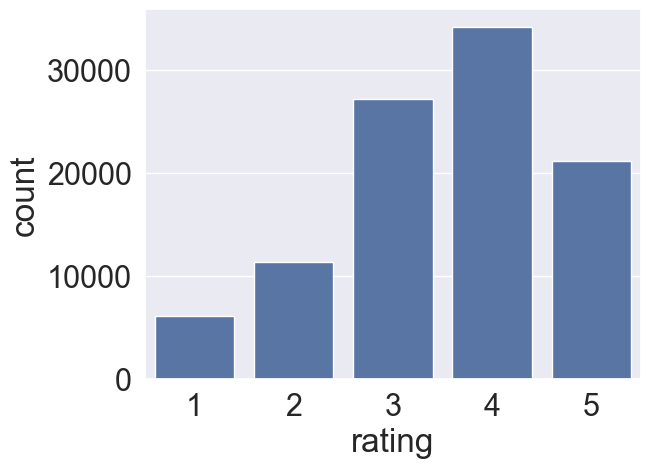

rating
mean: 3.52986
median: 4.0
mode: 0    4
Name: rating, dtype: int64
var: 1.2671410518105182
skewness: -0.510143949217015
kurtosis: -0.4127391723827025


age
mean: 32.96985
median: 30.0
mode: 0    27
Name: age, dtype: int64
var: 133.6942579200792
skewness: 0.7331066983316664
kurtosis: -0.16841519666657367


Gender ratios
gender
M    0.7426
F    0.2574
Name: count, dtype: float64


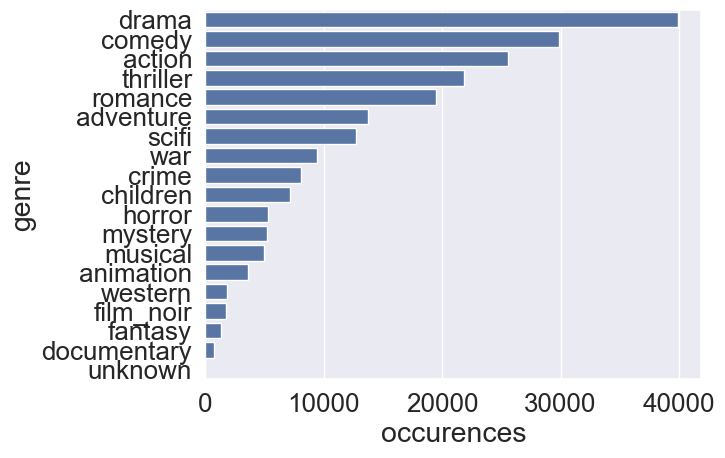

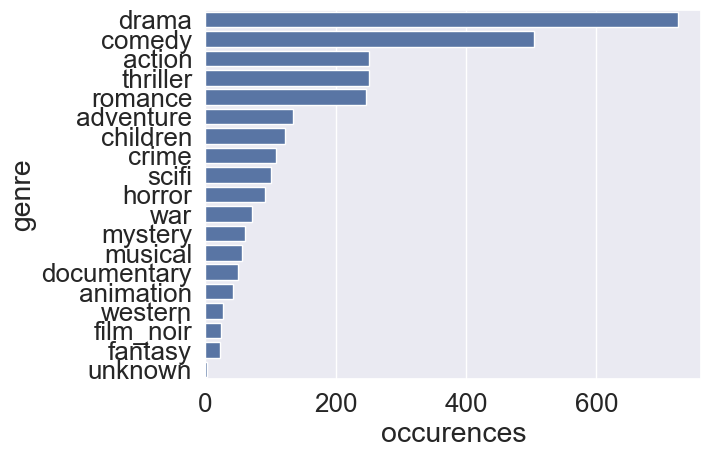

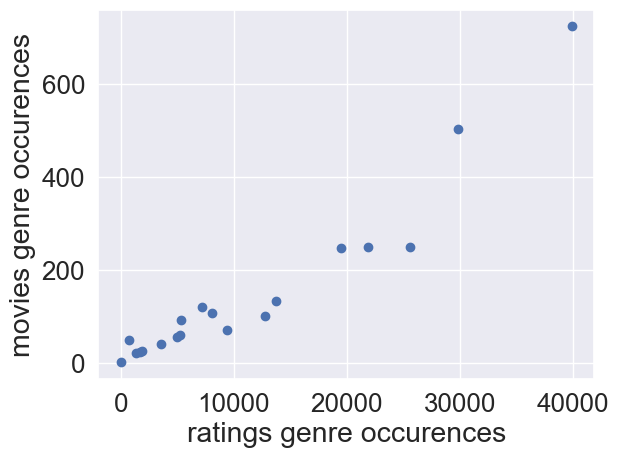

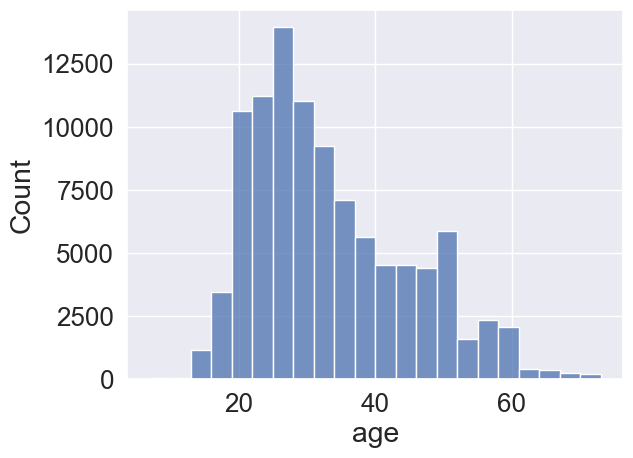

In [16]:
sns.set(style="darkgrid")

sns.set(font_scale=2)
sns.countplot(x="rating", data=df)
plt.show()

# print(df.columns)
vars = ["rating", "age"]
datetime_vars = ["timestamp", "release_date"]
for var in vars:
    print(var)
    print("mean:", df[var].mean())
    print("median:", df[var].median())
    print("mode:", df[var].mode())
    print("var:", df[var].var())
    print("skewness:", df[var].skew())
    print("kurtosis:", df[var].kurtosis())
    print("\n")
    
print("Gender ratios")
print(df["gender"].value_counts()/df["gender"].value_counts().sum())

genres = df.columns[11:]
genre_occurences_ratings = []
for genre in genres:
    genre_occurences_ratings.append(df[genre].value_counts()[True])

genres_occurences = pd.DataFrame({"genre": genres, "occurences": genre_occurences_ratings})
genres_occurences = genres_occurences.sort_values(by="occurences", ascending=False)

sns.set(font_scale=1.7)
sns.barplot(data=genres_occurences, x="occurences", y="genre")
plt.show()

genres = item.columns[5:]
item.iloc[:,5:] = item.iloc[:,5:].astype(bool)
genre_occurences_movies = []
for genre in genres:
    genre_occurences_movies.append(item[genre].value_counts()[True])

genres_occurences = pd.DataFrame({"genre": genres, "occurences": genre_occurences_movies})
genres_occurences = genres_occurences.sort_values(by="occurences", ascending=False)

sns.set(font_scale=1.7)
sns.barplot(data=genres_occurences, x="occurences", y="genre")
plt.show()

plt.scatter(x=genre_occurences_ratings, y=genre_occurences_movies)
plt.xlabel("ratings genre occurences")
plt.ylabel("movies genre occurences")
plt.show()

sns.histplot(data=df, x="age", binwidth=3)
plt.show()


# df.groupby(df["release_date"].dt.year).count().plot(kind="bar")
